In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#10x10 mm chip
cell_height = np.linspace(40, 120, 9)

capacitances = [35.63, 44.23, 52.43, 62.28, 71.39, 81.39, 91.62, 99.41, 108.93]
inductances = [71.23, 74.48, 75.62, 75.77, 76.76, None, 77.38, 77.49, 77.53]
max_cells = [1300, 1300, 1300, 1100, 1100, 1100, 900, 900, 900]

optimal_heights = [cell_height[3*i+2] for i in range(3)]
optimal_heights = np.append(optimal_heights, [210, 270])

optimal_max_cells = [max_cells[3*i+2] for i in range(3)]
optimal_max_cells = np.append(optimal_max_cells, [882, 672])

print(optimal_max_cells)

optimal_capacitances = [capacitances[3*i+2] for i in range(3)]
optimal_capacitances = np.append(optimal_capacitances, [190, 242.2])

[1300 1100  900  882  672]


Text(0, 0.5, 'Impedance (pH)')

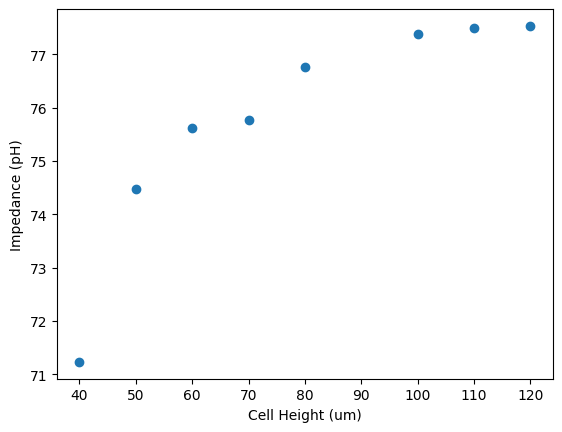

In [5]:
#Cell height vs max cells
plt.figure()
plt.scatter(cell_height, inductances)
plt.xlabel('Cell Height (um)')
plt.ylabel('Impedance (pH)')

Text(0, 0.5, '# of Cells')

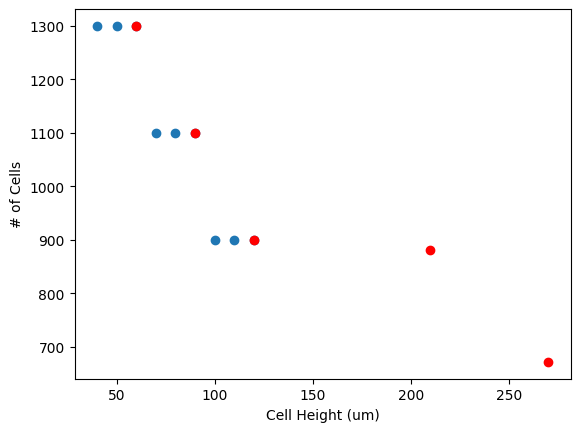

In [72]:
#Cell height vs max cells
plt.figure()
plt.scatter(cell_height, max_cells)
plt.scatter(optimal_heights, optimal_max_cells, c='red')
plt.xlabel('Cell Height (um)')
plt.ylabel('# of Cells')

In [73]:
from scipy.optimize import curve_fit

def lin(x, m):
    return m*x

param, param_cov = curve_fit(lin, cell_height, capacitances)

print(param)

[0.90168396]


[ 52.43  81.39 108.93 190.   242.2 ]


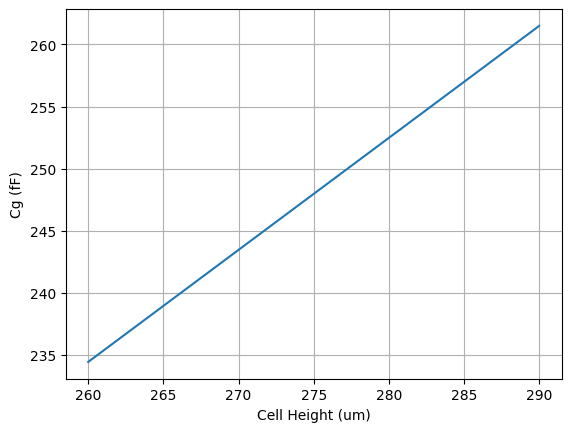

In [79]:
#Cell height vs capacitance
plt.figure()
# plt.scatter(cell_height, capacitances)
# plt.scatter(optimal_heights, optimal_capacitances, c='red')
x = np.linspace(260, 290)
plt.plot(x, lin(x, param[0]))
plt.xlabel('Cell Height (um)')
plt.ylabel('Cg (fF)')
plt.grid()
print(optimal_capacitances)

In [75]:
optimal_impedances = [118.5, 95.1, 92.1]
optimal_max_gains = [49, 83, 105]
optimal_reflection_coeff = [(z-50)/(z+50) for z in optimal_impedances]

print(optimal_reflection_coeff)

[0.4065281899109792, 0.31082012405237763, 0.2962702322308233]
